In [25]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import re

In [24]:
cas9 = {}
cas12a = {}

# import cas9 data
with open('cas9_GOANA.txt', 'r') as f:
    for line in f:
        line = line.rstrip()
        if line.startswith("Chromosome") or line.startswith("Consensus") or line.startswith("Sequence") or line.startswith("Mutation") or line.startswith("Total"):
            continue
        if line.startswith("----") or not line or line.startswith(" "):
            continue
        bits = line.split()
        if len(bits) != 7:
            continue
        read, mutation, cperc, ccount, tperc, tcount, diff = line.split()
        if int(tcount) == 0:
            continue
        if mutation not in cas9:
            cas9[mutation] = int(tcount)
        else:
            cas9[mutation] += int(tcount)
        
# import cas12a data
with open('cas12a_GOANA.txt', 'r') as f:
    for line in f:
        line = line.rstrip()
        if line.startswith("Chromosome") or line.startswith("Consensus") or line.startswith("Sequence") or line.startswith("Mutation") or line.startswith("Total"):
            continue
        if line.startswith("----") or not line or line.startswith(" "):
            continue
        bits = line.split()
        if len(bits) != 7:
            continue
        read, mutation, cperc, ccount, tperc, tcount, diff = line.split()
        if int(tcount) == 0:
            continue
        if mutation not in cas12a:
            cas12a[mutation] = int(tcount)
        else:
            cas12a[mutation] += int(tcount)
        

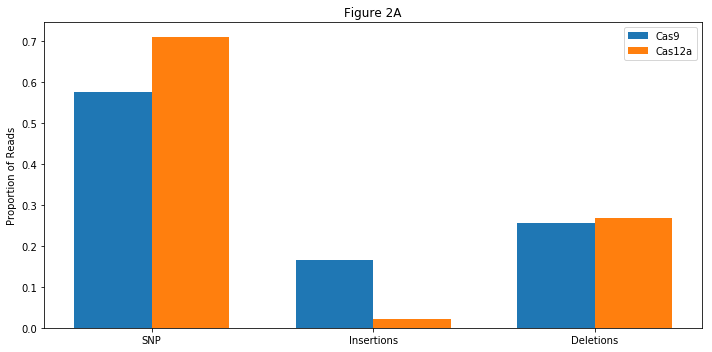

In [11]:
#Create Figure 2A
def createFigure2A(myDict):
    data = {"-": 0, "+":0 , "SNP":0}
    for mutation in myDict:
        count = myDict[mutation]
        muts = mutation.split(',')
        mutSymbols = []
        for a in muts:
            if a[0] == "-":
                data["-"] += count
            elif a[1] == "+":
                data["+"] += count
            else:
                data["SNP"] += count
    return data

cas9Data = createFigure2A(cas9)
cas12Data = createFigure2A(cas12a)
cas9Total = sum(cas9Data.values())
cas12Total = sum(cas12Data.values())
cas9Values = [cas9Data["SNP"]/cas9Total, cas9Data["+"]/cas9Total, cas9Data["-"]/cas9Total]
cas12Values = [cas12Data["SNP"]/cas12Total, cas12Data["+"]/cas12Total, cas12Data["-"]/cas12Total]
labels = ["SNP", "Insertions", "Deletions"]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, cas9Values, width, label='Cas9')
rects2 = ax.bar(x + width/2, cas12Values, width, label='Cas12a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of Reads')
ax.set_title('Figure 2A')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_xlabel(')
ax.legend()

fig.tight_layout()

plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

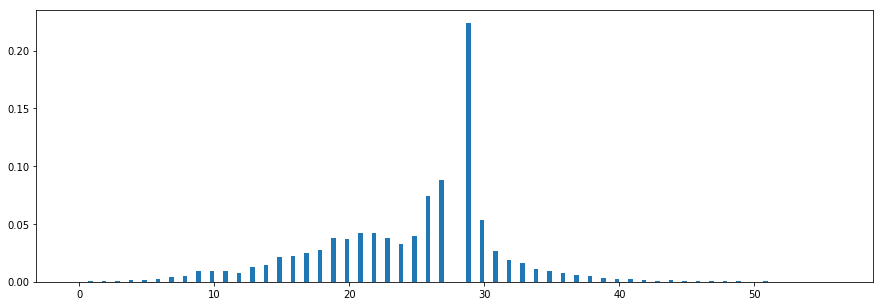

In [27]:
#Create Figure 2B
def createFigure2B(myDict):
    data = {}
    for mutation in myDict:
        count = myDict[mutation]
        muts = mutation.split(',')
        mutSymbols = []
        for a in muts:
            length = 0
            if a[0] == "-": #deletion
                if ":" in a: 
                    start, end = a[1:].split(':')
                    length = int(end)-int(start)+1
                    key = length * -1
                else:
                    key = -1
            elif a[1] == "+": #insertion
                res = re.search(r'\d+', a).group()
                key = int(res)
            else:
                continue
#             if key < -20:
#                 key = -20
#             if key > 20:
#                 key = 20
            data[0] = 0
            if key in data:
                data[key] += int(count)
            else:
                data[key] = int(count)
    return data

cas9Data = createFigure2B(cas9)
cas12Data = createFigure2B(cas12a)
cas9Total = sum(cas9Data.values())
cas12Total = sum(cas12Data.values())
cas9Values = []
cas12Values = []
labels = []

for key, value in sorted(cas9Data.items(), key=lambda x: int(x[0])):
    labels.append(key)
    cas9Values.append(value/cas9Total)
for key, value in sorted(cas12Data.items(), key=lambda x: int(x[0])):
    cas12Values.append(value/cas12Total)
        
labels[0] = "-20-"
labels[-1] = "20+"
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, cas9Values, width, label='Cas9')
rects2 = ax.bar(x + width/2, cas12Values, width, label='Cas12a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of Reads')
ax.set_title('Figure 2B')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Mutation Type')
ax.legend()

fig.tight_layout()

plt.show()

In [30]:
c9neg = 0
c9pos = 0
c12neg = 0
c12pos = 0
c9negt = 0
c9post = 0
c12negt = 0
c12post = 0

for key, value in sorted(cas9Data.items(), key=lambda x: int(x[0])):
    if key < 0:
        c9neg += value * key
        c9negt += value
    if key > 0:
        c9pos += value * key
        c9post += value

for key, value in sorted(cas12Data.items(), key=lambda x: int(x[0])):
    if key < 0:
        c12neg += value * key
        c12negt += value
    if key > 0:
        c12pos += value * key
        c12post += value
print(c9neg/c9negt, c9pos/c9post, c12neg/c12negt, c12pos/c12post)
# for key, value in sorted(cas12Data.items(), key=lambda x: int(x[0])):
#     cas12Values.append(value/cas12Total)

-7.1633366072681355 2.754979753969857 -8.753575418994414 3.4363048982799267


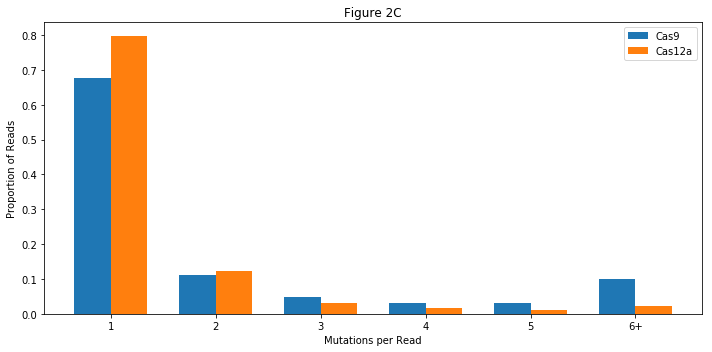

In [15]:
#Create Figure 2C
def createFigure2C(myDict):
    counts = {}
    for mutation in myDict:
        count = myDict[mutation]
        mutNum = mutation.count(",")+1
        if mutNum > 6:
            mutNum = 6
        if mutNum in counts:
            counts[mutNum] += int(count)
        else:
            counts[mutNum] = int(count)
    return counts

cas9counts = createFigure2C(cas9)
cas12acounts = createFigure2C(cas12a)

cas9Total = sum(cas9counts.values())
cas12Total = sum(cas12acounts.values())
cas9Values = []
cas12Values = []
labels = ["1", "2", "3", "4", "5", "6+"]
for key in sorted(cas9counts):
    cas9Values.append(cas9counts[key]/cas9Total)
    cas12Values.append(cas12acounts[key]/cas12Total)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, cas9Values, width, label='Cas9')
rects2 = ax.bar(x + width/2, cas12Values, width, label='Cas12a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of Reads')
ax.set_title('Figure 2C')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Mutations per Read')
ax.legend()

fig.tight_layout()

plt.show()


    


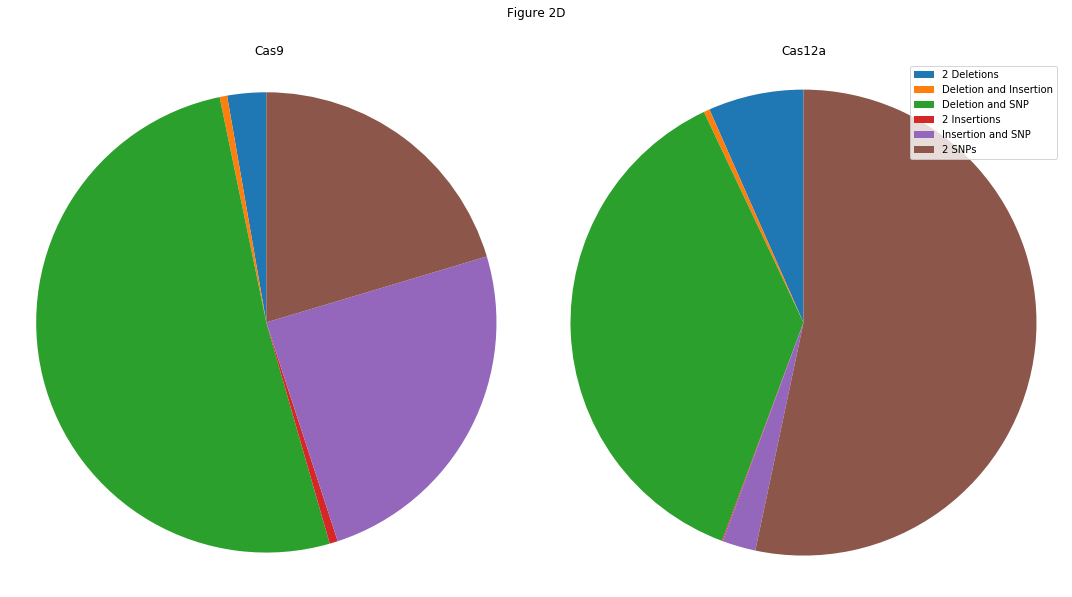

In [18]:
#Create Figure 2D
def createFigure2D(myDict):
    data = {}
    for mutation in myDict:
        count = myDict[mutation]
        mutNum = mutation.count(",")+1
        if mutNum != 2:
            continue
        muts = mutation.split(',')
        mutSymbols = []
        for a in muts:
            if a[0] == "-":
                mutSymbols.append("D")
            elif a[1] == "+":
                mutSymbols.append("I")
            else:
                mutSymbols.append("S")
        key = ''.join(sorted(mutSymbols))
        if key in data:
            data[key] += int(count)
        else:
            data[key] = int(count)
    return data
            
cas9Data = createFigure2D(cas9)
cas12Data= createFigure2D(cas12a)

cas9Total = sum(cas9Data.values())
cas12Total = sum(cas12Data.values())
cas9Values = []
cas12Values = []
labels = []
longLabels = {'DD': '2 Deletions',
             'II': '2 Insertions',
             'SS': '2 SNPs',
             'DI': 'Deletion and Insertion',
             'DS': 'Deletion and SNP',
             'IS': 'Insertion and SNP'}
for key in sorted(cas9Data):
    labels.append(longLabels[key])
    cas9Values.append(cas9Data[key]/cas9Total)
    cas12Values.append(cas12Data[key]/cas12Total)

fig, axs = plt.subplots(ncols=2, figsize=(15,15))

axs[0].pie(cas9Values, startangle=90)
axs[0].axis('equal')
axs[1].pie(cas12Values, startangle=90)
axs[1].axis('equal')
axs[0].set_title("Cas9")
axs[1].set_title("Cas12a")
# axs[0].legend(labels = labels)
axs[1].legend(labels = labels, loc = "upper right")
fig.suptitle('Figure 2D', y=0.55)
fig.tight_layout() 
fig.subplots_adjust(top=0.5)

plt.show()